# Spoken Language Recognition Using Convolutional Neural Networks

## Environment

In [2]:
train = 'train'
test = 'test'

hindi = 'hindi'
irish = 'irish'
japanese='japanese'
hungarian='hungarian'
punjabi='punjabi'

languages = [hindi, irish, japanese,hungarian,punjabi]
categories = [train, test]

original_dataset_paths = {}

original_dataset_paths[hindi] = '/wsu/home/hc/hc33/hc3344/langDS/hindi/' # TODO: Adapt this folder!
original_dataset_paths[irish] = '/wsu/home/hc/hc33/hc3344/langDS/irish/' # TODO: Adapt this folder!
original_dataset_paths[japanese] = '/wsu/home/hc/hc33/hc3344/langDS/japanese/' # TODO: Adapt this folder!
original_dataset_paths[hungarian] = '/wsu/home/hc/hc33/hc3344/langDS/hungarian/' # TODO: Adapt this folder!
original_dataset_paths[punjabi] = '/wsu/home/hc/hc33/hc3344/langDS/punjabi/' # TODO: Adapt this folder!

target_root_path = '/wsu/home/hc/hc33/hc3344/'

num_files_to_take_for_each_language = 100
train_rate = 0.8  # Use 80 % of the data for training and the rest for testing

## Import Libraries

In [2]:
import os

for lang in languages:
    if not os.path.isdir(original_dataset_paths[lang]):
        raise
    for category in categories:
        if not os.path.isdir(target_root_path + category + '/' + lang):
            raise

for lang in languages:
    if not os.path.isfile(original_dataset_paths[lang] + 'validated.tsv'):
        raise
    if not os.path.isdir(original_dataset_paths[lang] + 'clips'):
        raise

In [3]:
import librosa as lr
from glob import glob
from random import shuffle
from shutil import copy2
import numpy as np
import pandas as pd
import warnings

In [4]:
def copy_audio_files_for_language(lang):
    
    print('')
    print('Copying files for language ' + lang + '...')
    print('')
    
    # Only take validated speech data
    df = pd.read_csv(original_dataset_paths[lang] + 'validated.tsv', sep='\t')
    all_filenames = df['path'].tolist()
    shuffle(all_filenames)
    
    counter = 0
    
    category = train    
    
    # Process files
    for filename in all_filenames:
        file = original_dataset_paths[lang] + 'clips/' + filename
        try:
            audio_segment, sample_rate = lr.load(file)
            if np.count_nonzero(audio_segment) == 0:
                raise Exception('Audio is silent!')
            if audio_segment.ndim != 1:
                raise Exception('Audio signal has wrong number of dimensions: ' + str(audio_segment.ndim))
            duration_sec = lr.core.get_duration(audio_segment, sr=sample_rate)
        except Exception as e:
            print('WARNING! Error while loading file \"' + file + '\": ' + str(e) + ' - Skipping...')
            continue
        
        # Only copy audio files with a certain minimum duration
        if 0 < duration_sec < 10.0:
            copy2(file, target_root_path + category + '/' + lang)
            counter += 1
        
        # Stop after collecting enough files
        if counter == int(num_files_to_take_for_each_language * train_rate):
            category = test
        if counter == num_files_to_take_for_each_language:
            break

In [5]:
warnings.simplefilter('ignore', UserWarning)

copy_audio_files_for_language(irish)

warnings.simplefilter('ignore', UserWarning)


Copying files for language irish...

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638314.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638314.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183809.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183809.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_21661675.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_21661675.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182707.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182707.mp3' - Skippi

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18186765.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18186765.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182291.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182291.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181961.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181961.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18265276.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18265276.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18239191.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18239191.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638334.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638334.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_21505068.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_21505068.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18200591.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18200591.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638637.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638637.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18953298.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18953298.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17686764.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17686764.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184268.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184268.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18239186.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18239186.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17687661.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17687661.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184500.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184500.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17658207.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17658207.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182299.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182299.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18713258.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18713258.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17585040.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17585040.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183507.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183507.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17663749.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17663749.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_20663699.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_20663699.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17687740.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17687740.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_19328268.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_19328268.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17687727.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17687727.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18186776.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18186776.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17734712.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17734712.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17899130.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17899130.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17581938.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17581938.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17571516.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17571516.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17732192.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17732192.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17674940.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17674940.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184379.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184379.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17546165.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17546165.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17656173.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17656173.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184262.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184262.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17796000.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17796000.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181959.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181959.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17688164.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17688164.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17832709.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17832709.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17616701.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17616701.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184302.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184302.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17689080.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17689080.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17649494.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17649494.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181615.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181615.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184432.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184432.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17714943.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17714943.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17585046.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17585046.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17625571.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17625571.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17674939.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17674939.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_21267555.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_21267555.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17571487.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17571487.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184354.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184354.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182453.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182453.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17571514.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17571514.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18202509.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18202509.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_20710715.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_20710715.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183788.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183788.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18188143.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18188143.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17658202.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17658202.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17693589.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17693589.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17689109.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17689109.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18195438.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18195438.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17584217.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17584217.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182418.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182418.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17571519.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17571519.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183850.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183850.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18188325.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18188325.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18239184.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18239184.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18930151.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18930151.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_20742095.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_20742095.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17658223.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17658223.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586590.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586590.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17449488.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17449488.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_20660655.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_20660655.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638068.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638068.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638446.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638446.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638227.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638227.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18254900.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18254900.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_19048921.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_19048921.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18440023.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18440023.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181636.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181636.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17449464.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17449464.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17687717.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17687717.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17622347.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17622347.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17448314.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17448314.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_19053255.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_19053255.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17624588.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17624588.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17688517.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17688517.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17576755.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17576755.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17658211.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17658211.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586461.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586461.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17688184.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17688184.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17687030.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17687030.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638685.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638685.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17660062.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17660062.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18941857.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18941857.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18363657.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18363657.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17776030.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17776030.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586496.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586496.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17624598.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17624598.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183686.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183686.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18953313.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18953313.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18212856.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18212856.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638472.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638472.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17624592.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17624592.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638193.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638193.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17449475.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17449475.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638231.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638231.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184442.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184442.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182295.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182295.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18929878.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18929878.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17579629.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17579629.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17582028.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17582028.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17523506.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17523506.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_19328270.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_19328270.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17468137.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17468137.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17585010.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17585010.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17689153.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17689153.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18188508.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18188508.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18124461.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18124461.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17576757.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17576757.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17676430.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17676430.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17736631.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17736631.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183839.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183839.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182122.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182122.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183681.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183681.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_20663668.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_20663668.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18265286.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18265286.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17579918.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17579918.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17689115.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17689115.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18941867.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18941867.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17558920.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17558920.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17663557.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17663557.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18239225.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18239225.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17582207.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17582207.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17736677.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17736677.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586811.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586811.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17632199.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17632199.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181818.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181818.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17656174.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17656174.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183766.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183766.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17570078.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17570078.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17569846.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17569846.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_20649478.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_20649478.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17582326.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17582326.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18943343.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18943343.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17658213.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17658213.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18188330.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18188330.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17643447.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17643447.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18195396.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18195396.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181616.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181616.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638652.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638652.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182683.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182683.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17736018.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17736018.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17622346.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17622346.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182293.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182293.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17570054.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17570054.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18202503.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18202503.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17714964.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17714964.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182696.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182696.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17576752.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17576752.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17569899.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17569899.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183252.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183252.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_19553369.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_19553369.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18195472.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18195472.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17714944.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17714944.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182733.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182733.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17635777.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17635777.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181607.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181607.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17690046.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17690046.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638207.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638207.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181976.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181976.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17582561.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17582561.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183862.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183862.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17582322.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17582322.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182741.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182741.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17832711.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17832711.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17659970.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17659970.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17579632.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17579632.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184334.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184334.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586600.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586600.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17686769.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17686769.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183678.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183678.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18239198.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18239198.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17624594.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17624594.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17684690.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17684690.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17576759.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17576759.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638366.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638366.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638189.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638189.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17571656.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17571656.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17625660.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17625660.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17582035.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17582035.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18941932.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18941932.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18363585.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18363585.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17621605.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17621605.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17693612.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17693612.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17676386.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17676386.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181665.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18181665.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18953297.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18953297.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17663537.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17663537.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17622326.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17622326.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183699.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183699.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18186309.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18186309.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17732204.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17732204.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17468149.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17468149.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17681895.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17681895.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_19117847.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_19117847.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586604.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586604.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18133599.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18133599.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638463.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638463.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17663705.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17663705.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18186809.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18186809.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586593.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586593.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182882.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18182882.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17576748.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17576748.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183777.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183777.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18192157.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18192157.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17736757.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17736757.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18186853.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18186853.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18363689.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18363689.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17624591.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17624591.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17585032.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17585032.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18629794.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18629794.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17580292.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17580292.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638443.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638443.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17571424.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17571424.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17687645.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17687645.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18200604.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18200604.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183859.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183859.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18941847.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18941847.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17449466.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17449466.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18263190.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18263190.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17569834.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17569834.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18929827.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18929827.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17626148.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17626148.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184417.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184417.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18930136.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18930136.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17684686.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17684686.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184822.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184822.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586887.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586887.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17736617.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17736617.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183705.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18183705.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18363582.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18363582.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18713230.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18713230.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17570032.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17570032.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18202519.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18202519.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17674936.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17674936.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638188.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638188.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586815.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17586815.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638331.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_17638331.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184146.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/irish/clips/common_voice_ga-IE_18184146.mp3' - Skipping...
WARNING! Error while loading fil

In [6]:
warnings.simplefilter('ignore', UserWarning)

copy_audio_files_for_language(japanese)

warnings.simplefilter('ignore', UserWarning)


Copying files for language japanese...

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21568297.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21568297.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20184226.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20184226.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20101912.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20101912.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21996664.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21996664.mp3' - Ski

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21685815.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21685815.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20853312.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20853312.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20277643.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20277643.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20405052.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20405052.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19682764.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19682764.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20847915.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20847915.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20073686.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20073686.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20150023.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20150023.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22077469.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22077469.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20073784.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20073784.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19865563.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19865563.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22376220.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22376220.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21567840.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21567840.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22272557.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22272557.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22342555.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22342555.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22732863.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22732863.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21566850.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21566850.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22244947.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22244947.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22316729.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22316729.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22303755.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22303755.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22335166.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22335166.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22712464.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22712464.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19763934.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19763934.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22116743.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22116743.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19779797.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19779797.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22297752.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22297752.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22777699.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22777699.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22191241.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22191241.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074466.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074466.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22739719.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22739719.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22335066.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22335066.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20048503.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20048503.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22373934.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22373934.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20092598.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20092598.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20900007.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20900007.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22786067.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22786067.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21788024.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21788024.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20185803.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20185803.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21769617.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21769617.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22311261.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22311261.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22248117.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22248117.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21888245.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21888245.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20029409.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20029409.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20727573.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20727573.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22244770.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22244770.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20023551.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20023551.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19682963.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19682963.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074009.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074009.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22331372.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22331372.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22335065.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22335065.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22240461.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22240461.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19710846.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19710846.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20847852.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20847852.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22072759.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22072759.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20072992.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20072992.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21567872.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21567872.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20073242.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20073242.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21560729.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21560729.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21461894.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21461894.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20815307.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20815307.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19779945.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19779945.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22898285.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22898285.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21998474.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21998474.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20037945.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20037945.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21568364.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21568364.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20184290.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20184290.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20198568.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20198568.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20640253.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20640253.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20468158.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20468158.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20815886.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20815886.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22331383.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22331383.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23361337.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23361337.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20837851.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20837851.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20101986.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20101986.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23361335.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23361335.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21769310.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21769310.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22270113.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22270113.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20425581.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20425581.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21566673.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21566673.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19779453.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19779453.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22285909.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22285909.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20068815.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20068815.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22649550.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22649550.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22276133.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22276133.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19779868.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19779868.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22732804.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22732804.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20116141.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20116141.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22274123.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22274123.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20591881.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20591881.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20872495.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20872495.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22244904.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22244904.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20756163.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20756163.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20190633.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20190633.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074603.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074603.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22191861.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22191861.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20073643.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20073643.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20413433.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20413433.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21609464.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21609464.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20841519.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20841519.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22204019.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22204019.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20726924.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20726924.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22272597.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22272597.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20048539.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20048539.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22467336.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22467336.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22341371.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22341371.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23919611.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23919611.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22116832.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22116832.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074367.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074367.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20900017.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20900017.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22645414.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22645414.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23874899.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23874899.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20837812.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20837812.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22736869.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22736869.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22245734.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22245734.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20958559.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20958559.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21853991.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21853991.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22794219.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22794219.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20072975.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20072975.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22527746.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22527746.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23650251.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23650251.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22544559.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22544559.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21646911.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21646911.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21567594.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21567594.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20456470.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20456470.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22116606.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22116606.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20184267.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20184267.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22741420.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22741420.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20837919.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20837919.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20815885.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20815885.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19816240.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19816240.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20853338.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20853338.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22741347.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22741347.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22766592.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22766592.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074049.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074049.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20204411.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20204411.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20727670.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20727670.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074459.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074459.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074836.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074836.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22151702.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22151702.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22240504.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22240504.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21809786.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21809786.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21567415.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21567415.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22649832.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22649832.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22732818.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22732818.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20204887.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20204887.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21077197.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21077197.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22376219.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22376219.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20815225.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20815225.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20461168.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20461168.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20092859.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20092859.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20097402.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20097402.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21553717.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21553717.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20110843.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20110843.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22342389.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22342389.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19779418.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19779418.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22645413.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22645413.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21647125.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21647125.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20847079.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20847079.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20184342.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20184342.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20967467.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20967467.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20499963.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20499963.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19799299.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19799299.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23633641.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23633641.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22645417.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22645417.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074288.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074288.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23633948.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_23633948.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_24065751.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_24065751.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20847088.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20847088.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20847096.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20847096.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20815275.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20815275.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22736726.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22736726.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22766490.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22766490.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20934715.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20934715.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20150021.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20150021.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22324852.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22324852.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22307367.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22307367.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22245253.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22245253.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22297711.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22297711.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20742439.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20742439.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20991553.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20991553.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20967469.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20967469.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20029412.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20029412.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20116111.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20116111.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21358328.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21358328.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22120021.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22120021.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21802310.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21802310.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074394.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074394.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22341379.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22341379.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20289772.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20289772.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22120091.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22120091.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22297753.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22297753.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20073937.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20073937.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22211371.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22211371.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22344179.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22344179.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20841687.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20841687.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22344109.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22344109.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20853336.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20853336.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20837850.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20837850.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22331385.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22331385.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20872491.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20872491.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20101938.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20101938.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22271857.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22271857.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20101915.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20101915.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22656426.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22656426.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22635892.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22635892.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20640494.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20640494.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20101925.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20101925.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21561044.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21561044.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20184279.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20184279.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21567996.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_21567996.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20640619.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20640619.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20721064.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20721064.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22275361.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22275361.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074582.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20074582.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19950106.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19950106.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19865545.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_19865545.mp3' - Skipping...
WARNING! Error while loading fil

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20815311.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20815311.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20853337.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20853337.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22342569.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_22342569.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20013801.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/japanese/clips/common_voice_ja_20013801.mp3' - Skipping...
WARNING! Error while loading fil

In [7]:
warnings.simplefilter('ignore', UserWarning)

copy_audio_files_for_language(hungarian)

warnings.simplefilter('ignore', UserWarning)


Copying files for language hungarian...

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549289.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549289.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664263.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664263.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635129.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635129.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23647516.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23647516.m

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23792059.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23792059.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680337.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680337.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637309.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637309.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680351.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680351.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631452.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631452.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23529194.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23529194.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790679.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790679.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664276.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664276.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387727.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387727.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629476.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629476.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637504.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637504.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23685815.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23685815.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632075.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632075.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632129.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632129.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599781.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599781.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794113.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794113.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23792044.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23792044.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637403.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637403.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23235411.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23235411.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23644985.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23644985.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23658912.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23658912.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664446.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664446.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630596.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630596.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23647654.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23647654.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390453.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390453.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23554731.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23554731.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796165.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796165.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599741.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599741.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637505.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637505.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664306.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664306.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635063.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635063.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23645029.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23645029.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794160.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794160.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824708.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824708.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356251.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356251.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824725.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824725.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790699.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790699.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23792125.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23792125.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790722.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790722.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637568.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637568.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23235414.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23235414.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674798.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674798.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23791891.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23791891.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390404.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390404.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689674.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689674.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674787.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674787.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23235976.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23235976.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635946.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635946.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599806.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599806.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637478.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637478.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23145096.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23145096.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387909.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387909.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629297.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629297.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680424.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680424.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796145.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796145.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23688087.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23688087.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629325.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629325.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356332.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356332.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674719.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674719.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549330.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549330.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23555084.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23555084.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680465.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680465.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631271.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631271.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631600.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631600.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356747.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356747.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631380.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631380.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23791797.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23791797.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356388.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356388.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735330.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735330.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23744206.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23744206.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689673.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689673.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631136.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631136.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631936.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631936.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735188.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735188.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23548933.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23548933.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637408.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637408.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387807.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387807.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23400331.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23400331.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689638.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689638.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632136.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632136.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637875.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637875.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387633.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387633.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23548775.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23548775.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629359.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629359.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23345573.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23345573.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630624.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630624.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356234.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356234.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689728.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689728.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619909.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619909.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387874.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387874.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23791859.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23791859.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23528797.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23528797.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631834.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631834.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23649737.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23649737.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23718054.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23718054.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631012.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631012.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629391.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629391.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824738.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824738.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23831537.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23831537.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23555147.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23555147.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794208.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794208.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635199.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635199.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794146.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794146.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824800.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824800.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23672601.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23672601.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23659259.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23659259.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23529748.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23529748.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735281.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735281.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794349.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794349.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634541.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634541.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637284.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637284.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23345533.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23345533.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631851.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631851.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637238.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637238.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629355.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629355.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387901.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387901.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794041.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794041.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23733650.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23733650.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23672808.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23672808.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23237421.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23237421.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796757.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796757.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794144.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794144.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631814.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631814.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735291.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735291.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637675.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637675.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23745046.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23745046.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794159.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794159.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680447.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680447.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23734866.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23734866.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599794.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599794.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824832.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824832.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23309300.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23309300.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631257.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631257.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632249.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632249.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23647574.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23647574.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634820.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634820.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619848.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619848.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23201311.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23201311.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599783.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599783.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674748.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674748.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23530731.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23530731.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23555036.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23555036.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23791916.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23791916.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23792030.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23792030.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23638126.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23638126.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634539.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634539.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23530448.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23530448.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23743978.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23743978.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356356.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356356.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634816.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634816.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23734852.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23734852.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674554.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674554.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23734851.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23734851.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23405160.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23405160.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680422.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680422.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23644883.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23644883.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796268.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796268.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796645.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796645.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630648.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630648.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23554729.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23554729.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23816512.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23816512.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635532.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635532.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23548804.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23548804.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664242.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664242.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390395.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390395.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790654.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790654.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23781433.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23781433.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23683796.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23683796.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632237.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632237.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637305.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637305.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23718098.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23718098.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387774.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387774.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629347.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629347.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619854.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619854.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23659261.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23659261.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23639606.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23639606.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23340734.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23340734.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634568.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634568.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631211.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631211.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23659034.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23659034.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794314.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794314.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23145220.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23145220.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23647528.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23647528.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23644758.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23644758.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824726.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824726.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689706.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689706.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619882.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619882.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23528790.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23528790.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387702.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387702.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23145076.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23145076.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23235435.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23235435.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632058.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632058.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632279.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632279.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631053.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631053.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630415.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630415.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23745020.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23745020.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23638099.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23638099.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631873.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631873.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23348190.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23348190.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390403.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390403.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23663668.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23663668.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794294.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794294.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794031.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794031.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637379.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637379.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790737.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790737.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390412.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390412.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23375691.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23375691.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23529325.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23529325.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630966.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630966.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23644885.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23644885.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23781442.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23781442.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689634.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689634.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599675.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599675.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631205.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631205.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631782.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631782.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631928.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631928.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635211.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635211.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387922.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387922.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631338.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631338.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356698.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356698.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23529472.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23529472.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637288.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637288.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790713.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790713.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356681.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356681.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631822.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631822.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629788.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629788.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631480.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631480.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631105.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631105.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356574.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356574.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824764.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824764.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23733654.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23733654.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23658802.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23658802.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631239.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631239.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23548779.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23548779.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23529469.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23529469.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735134.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735134.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23744962.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23744962.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689715.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689715.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387923.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387923.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680455.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23680455.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23659101.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23659101.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629363.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629363.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632127.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632127.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23658782.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23658782.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23613667.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23613667.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794275.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794275.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23743966.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23743966.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664339.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664339.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637749.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637749.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632139.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632139.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631469.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631469.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796370.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796370.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632061.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632061.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824827.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824827.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632095.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632095.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23781351.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23781351.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549280.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549280.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619842.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619842.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23145245.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23145245.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631023.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631023.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635179.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635179.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356668.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356668.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23405168.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23405168.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635954.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635954.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23734791.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23734791.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824729.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824729.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631805.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631805.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689734.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23689734.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387898.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387898.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23743959.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23743959.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23854323.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23854323.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23658996.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23658996.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630924.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630924.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635182.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635182.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23405164.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23405164.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790669.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790669.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23340735.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23340735.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735270.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735270.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23745074.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23745074.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23307877.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23307877.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629642.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629642.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630758.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630758.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664266.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664266.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387768.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387768.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630654.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630654.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637472.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637472.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796712.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796712.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23555055.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23555055.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796307.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796307.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23638080.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23638080.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824776.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23824776.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23555202.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23555202.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634604.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634604.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796730.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796730.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631722.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631722.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23745108.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23745108.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549147.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549147.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23554718.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23554718.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387687.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387687.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637340.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637340.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631445.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631445.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23744896.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23744896.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674501.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674501.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637455.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637455.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23548729.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23548729.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631141.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631141.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635159.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635159.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23309345.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23309345.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387854.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387854.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387892.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387892.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794049.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794049.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631487.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631487.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630732.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630732.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629528.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629528.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23781375.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23781375.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796787.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796787.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23658799.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23658799.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387679.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23387679.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599767.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599767.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631221.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631221.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619906.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619906.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549107.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549107.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629342.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23629342.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637514.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637514.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23672738.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23672738.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631476.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631476.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796218.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23796218.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599699.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23599699.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23744069.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23744069.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356288.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356288.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23644938.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23644938.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631890.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631890.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794074.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794074.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794358.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794358.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635553.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635553.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631462.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631462.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674490.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23674490.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390433.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390433.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632207.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632207.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23529326.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23529326.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635209.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635209.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356469.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23356469.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794151.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794151.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735193.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23735193.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637419.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637419.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637251.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637251.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632029.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23632029.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23554844.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23554844.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549184.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549184.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790724.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23790724.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794390.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794390.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635920.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635920.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619858.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23619858.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390359.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23390359.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631351.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631351.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630582.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630582.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23638020.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23638020.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23734847.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23734847.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631996.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631996.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637533.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637533.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637265.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23637265.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794104.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794104.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23555050.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23555050.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664222.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664222.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794206.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23794206.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549269.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23549269.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630646.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23630646.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664362.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23664362.mp3' - Skipping...
WARNING! Error while loa

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23658976.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23658976.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635210.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23635210.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634544.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23634544.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631378.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hungarian/clips/common_voice_hu_23631378.mp3' - Skipping...
WARNING! Error while loa

In [8]:
warnings.simplefilter('ignore', UserWarning)

copy_audio_files_for_language(punjabi)

warnings.simplefilter('ignore', UserWarning)


Copying files for language punjabi...

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22952845.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22952845.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22930233.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22930233.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22936714.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22936714.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22939334.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_2293

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22936681.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22936681.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22991831.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22991831.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22929550.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22929550.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_23355455.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_23355455.mp3' - Skipping...
WARNING! Error w

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22936680.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22936680.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22952846.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22952846.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22939347.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22939347.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22952871.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/punjabi/clips/common_voice_pa-IN_22952871.mp3' - Skipping...
WARNING! Error w

In [9]:
warnings.simplefilter('ignore', UserWarning)

copy_audio_files_for_language(hindi)

warnings.simplefilter('ignore', UserWarning)


Copying files for language hindi...

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23964484.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23964484.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23839869.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23839869.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23976076.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23976076.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23834324.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23834324.mp3' - Skipping...
WARNING! Error whi

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23936421.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23936421.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23937551.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23937551.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23976026.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23976026.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23847595.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23847595.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23849320.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23849320.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23976047.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23976047.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23937537.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23937537.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23852765.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23852765.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3

WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23847551.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23847551.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23795361.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23795361.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23844536.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23844536.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23901987.mp3": [Errno 2] No such file or directory: '/wsu/home/hc/hc33/hc3344/langDS/hindi/clips/common_voice_hi_23901987.mp3' - Skipping...
WARNING! Error while loading file "/wsu/home/hc/hc33/hc3

In [10]:
for category in categories:
    
    if category == train:
        num_files = int(num_files_to_take_for_each_language * train_rate)
    else:
        num_files = int(num_files_to_take_for_each_language * (1.0 - train_rate))
        
    for lang in languages:
        folder = target_root_path + category + '/' + lang + '/'
        all_files = glob(folder + '*.mp3')
        
        if len(all_files) < (num_files - 1):
            raise Exception('Folder \"' + folder + '\" only contains ' + str(len(all_files)) + ' files instead of ' + str(num_files) + '!')
            
print('Okay!')

Okay!


In [11]:
warnings.simplefilter('ignore', UserWarning)

for category in categories:
    for lang in languages:
        duration_sec = 0.0
        
        folder = target_root_path + category + '/' + lang + '/'
        all_files = glob(folder + '*.mp3')
        
        for file in all_files:
            duration_sec += lr.core.get_duration(filename=file)
            
        duration_h = duration_sec / 60.0 / 60.0
        print('Total duration of ' + lang + ' ' + category + ' is ' + str(round(duration_h, 1)) + ' h')
        
warnings.simplefilter('default', UserWarning)

Total duration of hindi train is 0.2 h
Total duration of irish train is 0.1 h
Total duration of japanese train is 0.2 h
Total duration of hungarian train is 0.2 h
Total duration of punjabi train is 0.2 h
Total duration of hindi test is 0.2 h
Total duration of irish test is 0.1 h
Total duration of japanese test is 0.2 h
Total duration of hungarian test is 0.2 h
Total duration of punjabi test is 0.2 h


In [12]:
dataset_root_path = '/wsu/home/hc/hc33/hc3344/'


image_width = 500
image_height = 128

augment_data_factor = 1.0 # Set-up how much of the training data should be augmented

In [13]:
import os
import librosa as lr
from librosa.display import waveplot
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
from IPython.display import Audio
import soundfile as sf

## Helper Functions

## Function for loading the audio file

In [14]:
def load_audio_file(audio_file_path):
    warnings.simplefilter('ignore', UserWarning)
    
    audio_segment, sample_rate = lr.load(audio_file_path)
    return audio_segment, sample_rate

    warnings.simplefilter('default', UserWarning)

## Functions for data augmentation

In [15]:
def add_noise(audio_segment, gain):
    num_samples = audio_segment.shape[0]
    noise = gain * np.random.normal(size=num_samples)
    return audio_segment + noise

## Determine all available audio files

In [16]:
audio_files = {}

for lang in languages:
    for category in categories:
        audio_files[lang + '.' + category] = glob(dataset_root_path + category + '/' + lang + '/*.mp3')

print(audio_files.keys())

dict_keys(['hindi.train', 'hindi.test', 'irish.train', 'irish.test', 'japanese.train', 'japanese.test', 'hungarian.train', 'hungarian.test', 'punjabi.train', 'punjabi.test'])


## Example

In [17]:
key = list(audio_files.keys())[1]
audio_file = audio_files[key][1]
audio_file

'/wsu/home/hc/hc33/hc3344/test/hindi/common_voice_hi_23795240.mp3'

In [18]:
audio, sample_rate = load_audio_file(audio_file)

Audio(audio, rate=sample_rate)

In [19]:
audio_segment_with_noise = add_noise(audio, 0.005)

Audio(audio_segment_with_noise, rate=sample_rate)

## Augment training dataset

In [20]:
def augment_audio_file_with_noise(audio_file_path):
    audio_segment, sample_rate = load_audio_file(audio_file_path)
    audio_segment_with_noise = add_noise(audio_segment, 0.005)
    audio_file_path_without_extension = os.path.splitext(audio_file_path)[0]
    augmented_audio_file_path = audio_file_path_without_extension + '_augmented_noise.wav'
    sf.write(augmented_audio_file_path, audio_segment_with_noise, sample_rate)

In [21]:
for lang in languages:
    category = train
        
    all_audio_files = audio_files[lang + '.' + category]
        
    num_files = int(len(all_audio_files) * augment_data_factor)

    for i in range(num_files):
        if i % (num_files / 10) == 0:
            print('Still processing ' + lang + ' ' + category + ' ' + str(i) + '/' + str(num_files))
        augment_audio_file_with_noise(all_audio_files[i])

Still processing hindi train 0/176
Still processing irish train 0/154
Still processing japanese train 0/147
Still processing hungarian train 0/189
Still processing punjabi train 0/165
Still processing punjabi train 33/165
Still processing punjabi train 66/165
Still processing punjabi train 99/165
Still processing punjabi train 132/165


In [22]:
sample_rate = 8000
image_width = 500
image_height = 128

In [23]:
import os
import librosa as lr
from librosa.display import waveplot
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import imageio
import warnings
from IPython.display import Audio

In [24]:
def load_audio_file(audio_file_path):
    warnings.simplefilter('ignore', UserWarning)
    
    audio_segment, _ = lr.load(audio_file_path, sr=sample_rate)
    return audio_segment

    warnings.simplefilter('default', UserWarning)


## Function to repeat the audio segment to a length of 10 seconds

In [25]:
def fix_audio_segment_to_10_seconds(audio_segment):
    target_len = 10 * sample_rate
    audio_segment = np.concatenate([audio_segment]*3, axis=0)
    audio_segment = audio_segment[0:target_len]
    
    return audio_segment

## Function to generate the mel-scaled spectrogram from the 10-seconds long audio segment

In [26]:
def spectrogram(audio_segment):
    # Compute mel-scaled spectrogram image
    hl = audio_segment.shape[0] // image_width
    spec = lr.feature.melspectrogram(audio_segment, n_mels=image_height, hop_length=int(hl))

    # Logarithmic amplitudes
    image = lr.core.power_to_db(spec)

    # Convert to numpy matrix
    image_np = np.asmatrix(image)

    # Normalize and scale
    image_np_scaled_temp = (image_np - np.min(image_np))
    
    image_np_scaled = image_np_scaled_temp / np.max(image_np_scaled_temp)

    return image_np_scaled[:, 0:image_width]

## Function for converting to integer for image storing

In [27]:
def to_integer(image_float):
    # range (0,1) -> (0,255)
    image_float_255 = image_float * 255.
    
    # Convert to uint8 in range [0:255]
    image_int = image_float_255.astype(np.uint8)
    
    return image_int


## Determine all available audio files

In [28]:
audio_files = {}

for lang in languages:
    for category in categories:
        dataset_path = dataset_root_path + category + '/' + lang
        
        # If you wish to preprocess all data use the following command
        audio_files[lang + '.' + category] = glob(dataset_path + '/*.mp3') + glob(dataset_path + '/*.wav')
        
        # If you only wish to preprocess augmented data use the following command
        #audio_files[lang + '.' + category] = glob(dataset_path + '/*.wav')

print(audio_files.keys())

dict_keys(['hindi.train', 'hindi.test', 'irish.train', 'irish.test', 'japanese.train', 'japanese.test', 'hungarian.train', 'hungarian.test', 'punjabi.train', 'punjabi.test'])



## Example

In [29]:
key = list(audio_files.keys())[0]
audio_file = audio_files[key][0]
audio_file

'/wsu/home/hc/hc33/hc3344/train/hindi/common_voice_hi_23795240.mp3'

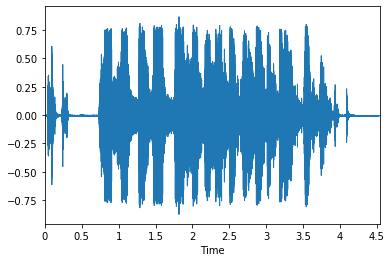

In [30]:
audio = load_audio_file(audio_file)

waveplot(audio, sr=sample_rate)
plt.show()

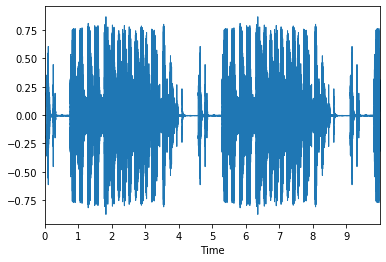

In [31]:
audio_fixed = fix_audio_segment_to_10_seconds(audio)

waveplot(audio_fixed, sr=sample_rate)
plt.show()

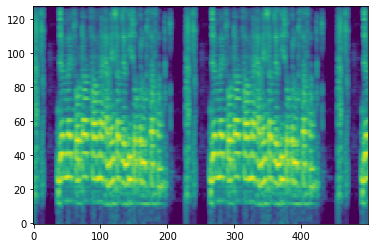

In [32]:
spectro = spectrogram(audio_fixed)

plt.imshow(spectro, origin='lower', aspect='auto')
plt.show()

In [33]:
spectro.shape

(128, 500)

## Parse all Audio Files
#### The following script will parse all audio files to extract mel-scaled spectrogram images and store them as PNG

In [34]:
def audio_to_image_file(audio_file):
    out_image_file = audio_file + '.png'
    audio = load_audio_file(audio_file)
    audio_fixed = fix_audio_segment_to_10_seconds(audio)
    if np.count_nonzero(audio_fixed) != 0:
        spectro = spectrogram(audio_fixed)
        spectro_int = to_integer(spectro)
        imageio.imwrite(out_image_file, spectro_int)
    else:
        print('WARNING! Detected an empty audio signal. Skipping...')

In [35]:
for lang in languages:
    for category in categories:
        all_audio_files = audio_files[lang + '.' + category]
        
        num_files = len(all_audio_files)
        
        for i in range(num_files):
            if i % (num_files / 50) == 0:
                print('Still processing ' + lang + ' ' + category + ' ' + str(i) + '/' + str(num_files))
            audio_to_image_file(all_audio_files[i])

Still processing hindi train 0/352
Still processing hindi test 0/172
Still processing irish train 0/308
Still processing irish test 0/151
Still processing japanese train 0/294
Still processing japanese test 0/121
Still processing hungarian train 0/378
Still processing hungarian test 0/138
Still processing punjabi train 0/330
Still processing punjabi test 0/134


## Show an Example Image
This script loads a file from disk and displays it.

/wsu/home/hc/hc33/hc3344/test/hindi/common_voice_hi_23830800.mp3.png


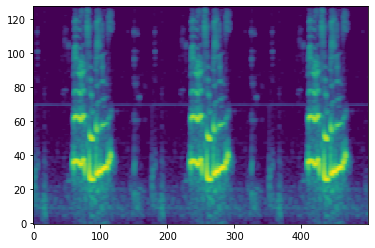

(128, 500)


In [36]:
list_of_image_files = glob(dataset_root_path + test + '/' + hindi + '/*.png')
image_file_path = list_of_image_files[0]

print(image_file_path)

image = imageio.imread(image_file_path)

plt.imshow(image, origin='lower', aspect='auto')
plt.show()

print(image.shape)

In [37]:
audio_file_path = os.path.splitext(image_file_path)[0]

Audio(audio_file_path)

## Training Environment

In [38]:
train_path = dataset_root_path + train

batch_size = 20
image_width = 500
image_height = 128

validation_split = 0.1
initial_learning_rate = 0.045

num_classes = len(languages)

model_file = dataset_root_path + 'model_1.h5'

In [39]:
from glob import glob
import math
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [40]:
all_files = glob(train_path + '/*/*.png')

num_validation = len(all_files) * validation_split
num_train = len(all_files) - num_validation

validation_steps = int(num_validation / batch_size)
steps_per_epoch = int(num_train / batch_size)

print('Steps per Epoch: ' + str(steps_per_epoch))
print('Validation steps: ' + str(validation_steps))

Steps per Epoch: 74
Validation steps: 8


## Training Batch Generator Function

The following function loads the available images for training, shuffles them and serves them to Keras' training algorithm.

In [41]:
image_data_generator = ImageDataGenerator(rescale=1./255, validation_split=validation_split)
train_generator = image_data_generator.flow_from_directory(train_path, batch_size=batch_size, class_mode='categorical', target_size=(image_height, image_width), color_mode='grayscale', subset='training')
validation_generator = image_data_generator.flow_from_directory(train_path, batch_size=batch_size, class_mode='categorical', target_size=(image_height, image_width), color_mode='grayscale', subset='validation')

Found 1498 images belonging to 5 classes.
Found 164 images belonging to 5 classes.


In [42]:
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)

In [43]:
def step_decay(epoch, lr):
    drop = 0.94
    epochs_drop = 2.0
    lrate = lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

learning_rate_decay = LearningRateScheduler(step_decay, verbose=1)

## Model definition

In [44]:
img_input = Input(shape=(image_height, image_width, 1))

img_conc = Concatenate(axis=3, name='input_concat')([img_input, img_input, img_input])

model_1 = InceptionV3(input_tensor=img_conc, weights=None, include_top=True, classes=5)

model_1.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 500, 1) 0                                            
__________________________________________________________________________________________________
input_concat (Concatenate)      (None, 128, 500, 3)  0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 249, 32)  864         input_concat[0][0]               
_______________________________________________________________________________________

In [45]:
model_1.compile(optimizer=RMSprop(lr=initial_learning_rate, clipvalue=2.0), loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import TimeDistributed
inputs=(128,500,1)
model_2 = Sequential()
model_2.add((Conv2D(64, kernel_size=3,activation='relu', input_shape=[128,500,1])))
model_2.add((Conv2D(32, kernel_size=3, activation='relu')))
model_2.add((MaxPooling2D(pool_size=2)))
model_2.add((Flatten()))
# model.add(LSTM(32,  activation='relu',return_sequences=True))
# model.add(LSTM(16, activation='relu', return_sequences=True))
model_2.add((Dense(5)))
# model.build((None,) + inputs)
model_2.compile(optimizer='RMSprop',
              loss='categorical_crossentropy', # Loss
              metrics=['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 126, 498, 64)      640       
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 124, 496, 32)      18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 248, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 492032)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 2460165   
Total params: 2,479,269
Trainable params: 2,479,269
Non-trainable params: 0
_________________________________________________________________


In [47]:
from tensorflow.keras.applications.resnet50 import ResNet50
model_3 = ResNet50(input_tensor=img_conc, weights=None, include_top=True, classes=5)

model_3.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 500, 1) 0                                            
__________________________________________________________________________________________________
input_concat (Concatenate)      (None, 128, 500, 3)  0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 506, 3)  0           input_concat[0][0]               
___________________________________________________________________________________________

In [48]:
model_3.compile(optimizer=RMSprop(lr=initial_learning_rate, clipvalue=2.0), loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers 
model_4 = VGG16(input_tensor=img_conc, # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')


In [50]:
import tensorflow

In [51]:
for layer in model_4.layers:
    layer.trainable = False
    

x = layers.Flatten()(model_4.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(5, activation='sigmoid')(x)

model_4 = tensorflow.keras.models.Model(model_4.input, x)

for i, layer in enumerate(model_4.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 input_concat False
2 block1_conv1 False
3 block1_conv2 False
4 block1_pool False
5 block2_conv1 False
6 block2_conv2 False
7 block2_pool False
8 block3_conv1 False
9 block3_conv2 False
10 block3_conv3 False
11 block3_pool False
12 block4_conv1 False
13 block4_conv2 False
14 block4_conv3 False
15 block4_pool False
16 block5_conv1 False
17 block5_conv2 False
18 block5_conv3 False
19 block5_pool False
20 flatten_1 True
21 dense_1 True
22 dropout True
23 dense_2 True


In [52]:
model_4.compile(optimizer=RMSprop(lr=initial_learning_rate, clipvalue=2.0), loss='categorical_crossentropy', metrics=['accuracy'])


In [53]:
history_1 = model_1.fit(train_generator, validation_data=validation_generator, epochs=20, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, callbacks=[early_stopping, learning_rate_decay])

Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 0.04500000178813934.
74/74 [==============================] - 1445s 19s/step - loss: 10.2845 - accuracy: 0.2372 - val_loss: 146453790720.0000 - val_accuracy: 0.2313
Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 0.042300001680850983.
74/74 [==============================] - 1455s 20s/step - loss: 1.8692 - accuracy: 0.2181 - val_loss: 42950392.0000 - val_accuracy: 0.2125
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 0.03976200073957443.
74/74 [==============================] - 1400s 19s/step - loss: 1.7102 - accuracy: 0.2794 - val_loss: 5071390.5000 - val_accuracy: 0.2000
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.03513370451182127.
74/74 [==============================] - 1401s 19s/step - loss: 1.6030 - accuracy: 0.3108 - val_loss: 76.4219 - val_accuracy: 0.2250
Epoch 5/20

Epoch 00005: LearningRateScheduler reducing learning rate

In [55]:
history_2 = model_2.fit(train_generator, validation_data=validation_generator, epochs=20, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, callbacks=[early_stopping, learning_rate_decay])

Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 0.00029010625439696014.
74/74 [==============================] - 665s 9s/step - loss: 9.0623 - accuracy: 0.1725 - val_loss: 9.1672 - val_accuracy: 0.1562
Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 0.00027269987913314253.
74/74 [==============================] - 663s 9s/step - loss: 9.0405 - accuracy: 0.1712 - val_loss: 9.0664 - val_accuracy: 0.1562
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 0.00025633787270635367.
74/74 [==============================] - 660s 9s/step - loss: 9.1278 - accuracy: 0.1732 - val_loss: 8.9657 - val_accuracy: 0.1625
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.00022650013815145938.
74/74 [==============================] - 659s 9s/step - loss: 9.1060 - accuracy: 0.1725 - val_loss: 8.9657 - val_accuracy: 0.1625
Epoch 5/20

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00020013552239979

In [ ]:
history_3 = model_3.fit(train_generator, validation_data=validation_generator, epochs=20, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, callbacks=[early_stopping, learning_rate_decay])

Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 0.04500000178813934.
74/74 [==============================] - 2591s 35s/step - loss: 36.1156 - accuracy: 0.2008 - val_loss: 4511129.5000 - val_accuracy: 0.1813
Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 0.042300001680850983.
74/74 [==============================] - 2521s 34s/step - loss: 1.7730 - accuracy: 0.2122 - val_loss: 2707304960.0000 - val_accuracy: 0.1813
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 0.03976200073957443.
74/74 [==============================] - 2522s 34s/step - loss: 1.6877 - accuracy: 0.1969 - val_loss: 5879.8828 - val_accuracy: 0.2313
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.03513370451182127.
74/74 [==============================] - 2526s 34s/step - loss: 1.6004 - accuracy: 0.2666 - val_loss: 768.1660 - val_accuracy: 0.2250
Epoch 5/20

Epoch 00005: LearningRateScheduler reducing learning rate to 0